In [3]:
!sudo apt-get install tree -qq > /dev/null

In [4]:
!nvidia-smi

Thu Apr  8 07:15:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
! git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
! pip install -r requirements.txt  # install

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [6]:
import zipfile
import os
import time

from google.colab import drive
from PIL import Image, ImageDraw

from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

In [7]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [8]:
zip_file = '/content/gdrive/MyDrive/data/faces/wider_kaggle_darknet.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall('/content/')

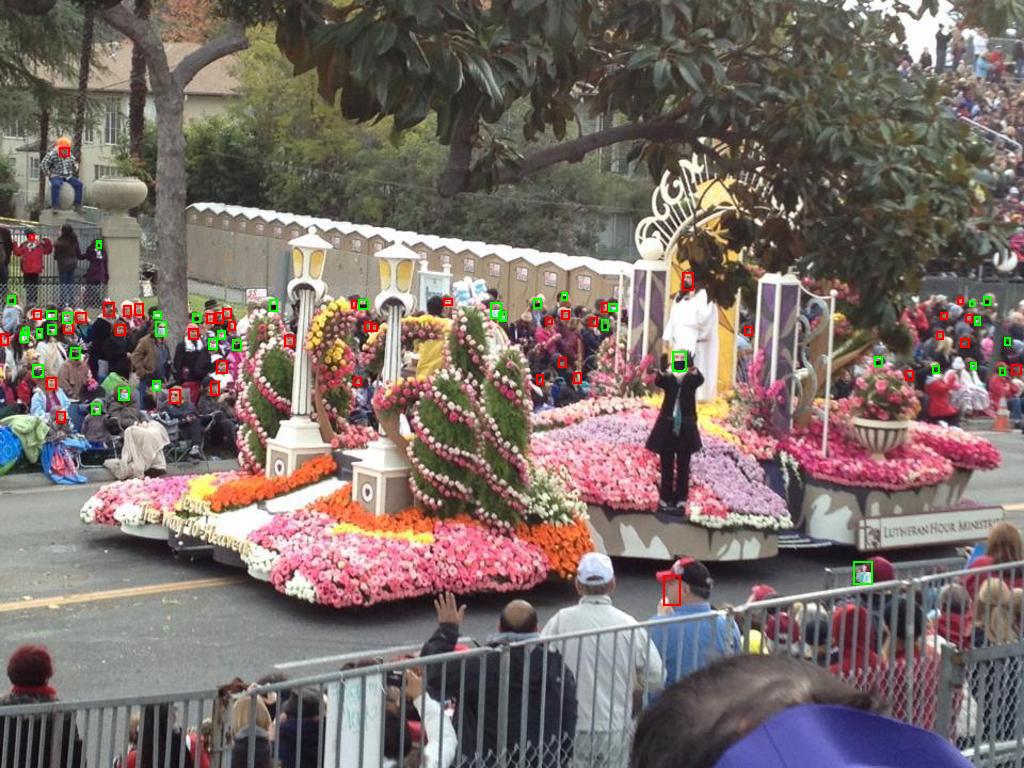

In [9]:
def test_dataset(name):
  image = Image.open(f'/content/content/faces/images/{name}.jpg')

  img_draw = image.copy()
  draw = ImageDraw.Draw(img_draw)
  with open(f'/content/content/faces/labels/{name}.txt') as f:
    for box in f:
      box = box.strip().split()
      x, y, bw, bh = float(box[1]), float(box[2]), float(box[3]), float(box[4])
      w, h = image.size

      x1, y1 = (x - bw / 2) * w, (y - bh / 2) * h
      x2, y2 = x1 + bw * w, y1 + bh * h
      
      outline = (255, 0, 0) if int(box[0]) else (0, 255, 0)
      draw.rectangle([x1, y1, x2, y2], outline=outline, width=2)
  
  return img_draw

test_dataset('train/0_Parade_Parade_0_136')

In [10]:
zip_file = '/content/gdrive/MyDrive/data/faces/yolov5s_custom_weights.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall('/content/')

In [11]:
!python train.py --img 1024 --batch 16 --epochs 10 --data ./data/faces.yaml --cfg ./models/yolov5s.yaml --weights /content/content/yolov5/runs/train/exp/weights/last.pt

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v4.0-189-gc03d590 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/faces.yaml', device='', entity=None, epochs=10, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[1024, 1024], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='/content/content/yolov5/runs/train/exp/weights/last.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-08 07:17:14.409538: I tensorflow/str

In [13]:
!zip -r '/content/gdrive/MyDrive/data/faces/20ep_yolov5s_custom_weights.zip' '/content/yolov5/runs/train/exp2/weights'

  adding: content/yolov5/runs/train/exp2/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp2/weights/best.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp2/weights/last.pt (deflated 8%)


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 1024 --conf 0.4 --source /content/content

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=1024, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/content', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOv5 🚀 v4.0-185-g74276d5 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/4 /content/content/masks.jpg: 544x1024 9 masks, 1 no_mask, Done. (0.014s)
image 2/4 /content/content/masks2.jpg: 736x1024 89 masks, 22 no_masks, Done. (0.016s)
image 3/4 /content/content/masks3.jpg: 672x1024 185 no_masks, Done. (0.016s)
image 4/4 /content/content/selfie.jpg: 576x1024 300 no_masks, Done. (0.014s)
Results saved to runs/detect/exp5
Done. (1.402s)


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 1024 --conf 0.4 --source /content/content/jerusalem.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=1024, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/content/jerusalem.mp4', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOv5 🚀 v4.0-185-g74276d5 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
video 1/1 (1/751) /content/content/jerusalem.mp4: 576x1024 37 masks, 43 no_masks, Done. (0.014s)
video 1/1 (2/751) /content/content/jerusalem.mp4: 576x1024 39 masks, 42 no_masks, Done. (0.012s)
video 1/1 (3/751) /content/content/jerusalem.mp4: 576x1024 37 masks, 49 no_masks, Done. (0.012s)
video 1/1 (4/751) /content/content/jerusalem.mp4: 576x1024 42 masks, 44 no_masks, Done. (0.013s)
video 1/1 (5/751) /content/content/jerusalem.mp4: 576x1024 41 masks, 38 no_masks, Done. (0.012s)
video 1/1 (6/751) /

In [ ]:
    python detect.py --weights my_nets/yolov5s_custom_dataset/weights/best20ep.pt --img 1024 --conf 0.4 --source my_nets/yolov5s_custom_dataset/input

In [ ]:
nnjmbmdsfsdfsdfsd